## Overview: 
Here I explore the UCI Defaul of Credit Cards data set (available on Kaggle:https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset  ) and compare several machine learning models (with/without feature engineering) for predicting default.

This notebook proceeds as follows:
1. Read and Explore the Data
    1. Look at NaNs
    1. ll 
1. Prepare the Data
    1. Cleaning the Data
    1. Feature Engineering
        1. Indicator variables
        1. Feature interactions

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_path = os.path.join(dirname, filename)

# Any results you write to the current directory are saved as output.

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [2]:
df_o = pd.read_csv(data_path)
#df_o.describe()
df_o.sample(10)
#df.columns
#df_o.info

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
22846,22847,40000.0,2,2,1,49,0,0,0,0,...,40400.0,40000.0,40000.0,3000.0,1800.0,2000.0,0.0,0.0,0.0,0
15904,15905,340000.0,2,2,2,30,0,0,0,0,...,27502.0,3490.0,99514.0,13000.0,2000.0,5000.0,3490.0,99000.0,5000.0,0
25555,25556,70000.0,2,2,2,42,1,2,0,0,...,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0
11702,11703,200000.0,1,3,1,45,0,0,0,0,...,60219.0,61748.0,64220.0,3200.0,2200.0,2200.0,2500.0,3500.0,90000.0,0
4992,4993,80000.0,1,2,1,36,2,2,2,2,...,81325.0,76550.0,78715.0,6900.0,0.0,5800.0,0.0,4000.0,2000.0,1
11379,11380,200000.0,2,2,1,44,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17240,17241,70000.0,2,3,1,34,1,2,0,0,...,68602.0,30252.0,47363.0,0.0,3000.0,3000.0,1508.0,20000.0,2500.0,0
28230,28231,210000.0,2,2,2,32,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,238.0,0
2180,2181,310000.0,1,1,2,37,0,0,0,0,...,12468.0,11809.0,12044.0,1193.0,1187.0,433.0,428.0,431.0,445.0,0
7662,7663,140000.0,2,2,1,58,2,2,2,2,...,72335.0,75508.0,77116.0,3200.0,2800.0,1200.0,4500.0,3000.0,0.0,1


In [3]:
# Check for NAs
df = df_o.dropna(axis = 0, how ='any') 

print("Old data frame length:", len(df_o), "\nNew data frame length:",  
       len(df), "\nNumber of rows with at least 1 NA value: ", 
       (len(df_o)-len(df))) 

df.columns


Old data frame length: 30000 
New data frame length: 30000 
Number of rows with at least 1 NA value:  0


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.rename(columns = {"default.payment.next.month":"default_next"},inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next'],
      dtype='object')

In [5]:
y=df.default_next

In [6]:
#y.describe()
y.value_counts()
#y.head(10)

0    23364
1     6636
Name: default_next, dtype: int64

In [8]:
df.columns
x=df.copy()
x.drop(['default_next'],axis=1,inplace=True)
x.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### Baseline models

Here I'm giong to employ two common classifiers to get an idea of baseline predictive performance prior to any feature engineering or tuning. 

First up: Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=3)
lr_model = LogisticRegression(random_state=0,solver='lbfgs', multi_class='ovr')
lr_model.fit(x_train,y_train)

y_predict_lr = lr_model.predict(x_val)

In [31]:
from sklearn.metrics import roc_auc_score,recall_score, accuracy_score

auc = roc_auc_score(y_val, y_predict_lr)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_lr)
print('Recall(lin-reg,plain)',round(recall,5))

AUC (lin-reg,plain)= 0.49989
Recall(lin-reg,plain) 0.0


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


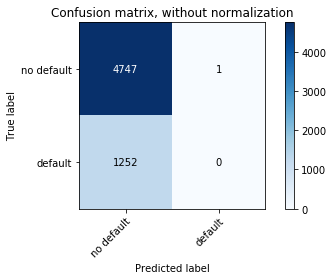

In [22]:
cm = confusion_matrix(y_val, y_predict_lr)
plot_confusion_matrix(y_val, y_predict_lr, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=8,random_state=3)
dt_model.fit(x_train,y_train)

y_predict_dt = dt_model.predict(x_val)

In [44]:
auc = roc_auc_score(y_val, y_predict_dt)
print('AUC (lin-reg,plain)=',round(auc,5))
recall = recall_score(y_val, y_predict_dt)
print('Recall(lin-reg,plain)',round(recall,5))
print(accuracy_score(y_val, y_predict_dt))

AUC (lin-reg,plain)= 0.6657
Recall(lin-reg,plain) 0.38259
0.8306666666666667


Confusion matrix, without normalization


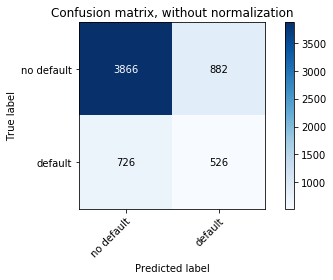

In [30]:
cm = confusion_matrix(y_val, y_predict_dt)
plot_confusion_matrix(y_val, y_predict_dt, classes=['no default','default'],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

Ideas for indicator variables and combined feature vairiables:
1. Male and under 25